# Step 1: Prepare the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
points = np.array([
    [1, 1],  # p1
    [3, 2],  # p2
    [9, 1],  # p3
    [3, 7],  # p4
    [7, 2],  # p5
    [9, 7],  # p6
    [4, 8],  # p7
    [8, 3],  # p8
    [1, 4]   # p9
])


# Step 2: Distance Functions

In [2]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.power(np.sum(np.abs(a - b) ** p), 1/p)

def proximity_matrix(points, distance_func):
    size = points.shape[0]
    matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if i != j:
                matrix[i][j] = distance_func(points[i], points[j])
    return matrix


# Step 3: Proximity Matrices

In [3]:
euclidean_dist_matrix = proximity_matrix(points, euclidean_distance)
manhattan_dist_matrix = proximity_matrix(points, manhattan_distance)
minkowski_dist_matrix = proximity_matrix(points, minkowski_distance)

print("Euclidean Distance Matrix:\n", euclidean_dist_matrix)
print("\nManhattan Distance Matrix:\n", manhattan_dist_matrix)
print("\nMinkowski Distance Matrix:\n", minkowski_dist_matrix)


Euclidean Distance Matrix:
 [[ 0.          2.23606798  8.          6.32455532  6.08276253 10.
   7.61577311  7.28010989  3.        ]
 [ 2.23606798  0.          6.08276253  5.          4.          7.81024968
   6.08276253  5.09901951  2.82842712]
 [ 8.          6.08276253  0.          8.48528137  2.23606798  6.
   8.60232527  2.23606798  8.54400375]
 [ 6.32455532  5.          8.48528137  0.          6.40312424  6.
   1.41421356  6.40312424  3.60555128]
 [ 6.08276253  4.          2.23606798  6.40312424  0.          5.38516481
   6.70820393  1.41421356  6.32455532]
 [10.          7.81024968  6.          6.          5.38516481  0.
   5.09901951  4.12310563  8.54400375]
 [ 7.61577311  6.08276253  8.60232527  1.41421356  6.70820393  5.09901951
   0.          6.40312424  5.        ]
 [ 7.28010989  5.09901951  2.23606798  6.40312424  1.41421356  4.12310563
   6.40312424  0.          7.07106781]
 [ 3.          2.82842712  8.54400375  3.60555128  6.32455532  8.54400375
   5.          7.07106781 

# Step 4: Hierarchical Clustering and SSE Calculation

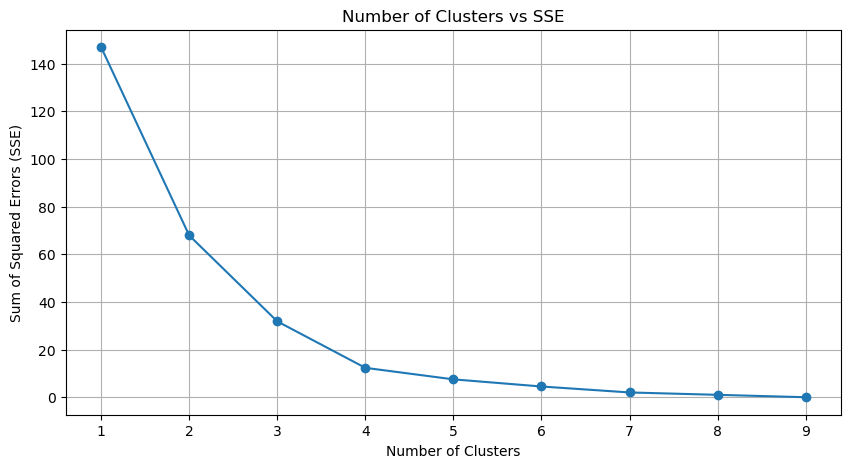

In [9]:
from sklearn.cluster import AgglomerativeClustering

def compute_sse(points, labels):
    sse = 0
    for cluster_id in np.unique(labels):
        cluster_points = points[labels == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - cluster_center) ** 2)
    return sse

# Determine the number of clusters and SSE
sse_values = []
num_clusters = range(1, 10)
for n_clusters in num_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(points)
    sse = compute_sse(points, labels)
    sse_values.append(sse)

# Plot SSE vs Number of Clusters
plt.figure(figsize=(10, 5))
plt.plot(num_clusters, sse_values, marker='o')
plt.title('Number of Clusters vs SSE')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


# Step 5: Plotting the Dendrogram

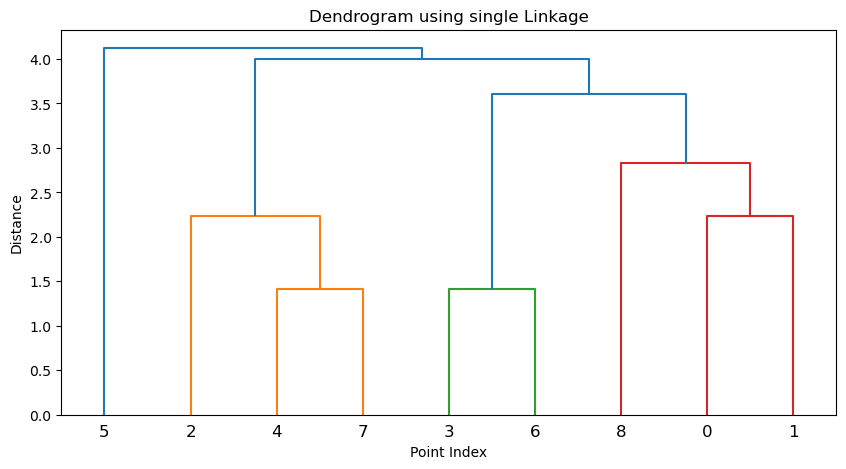

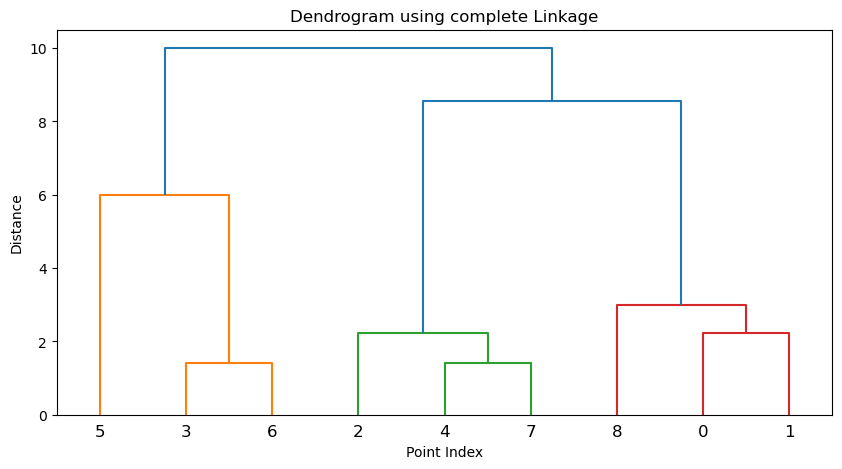

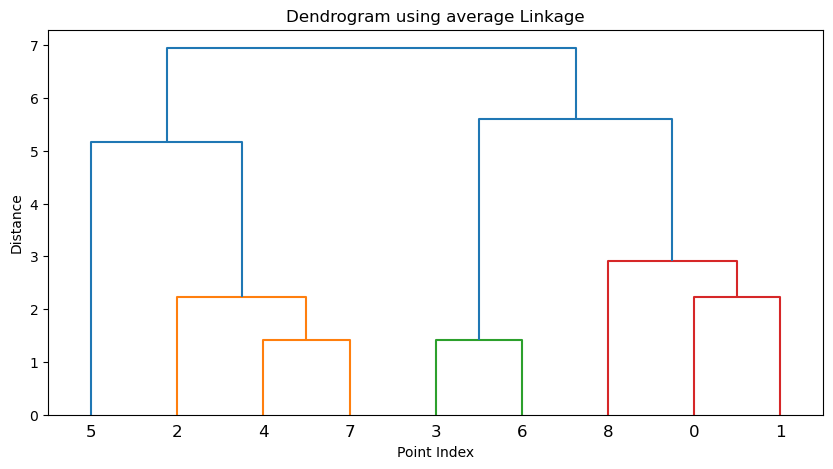

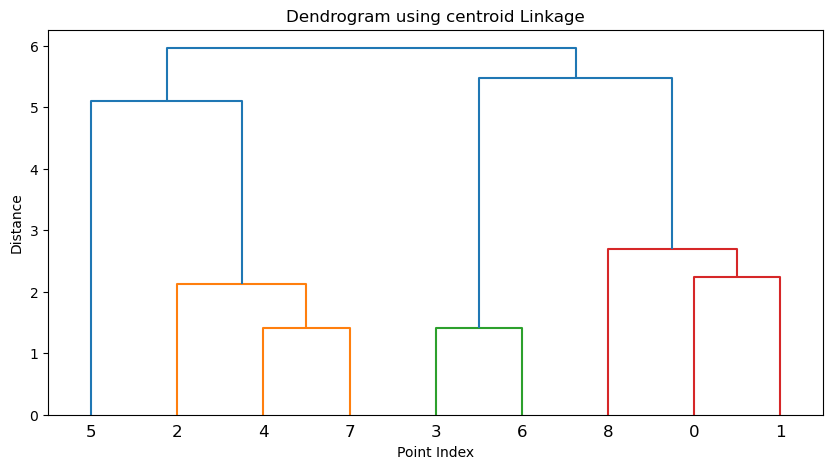

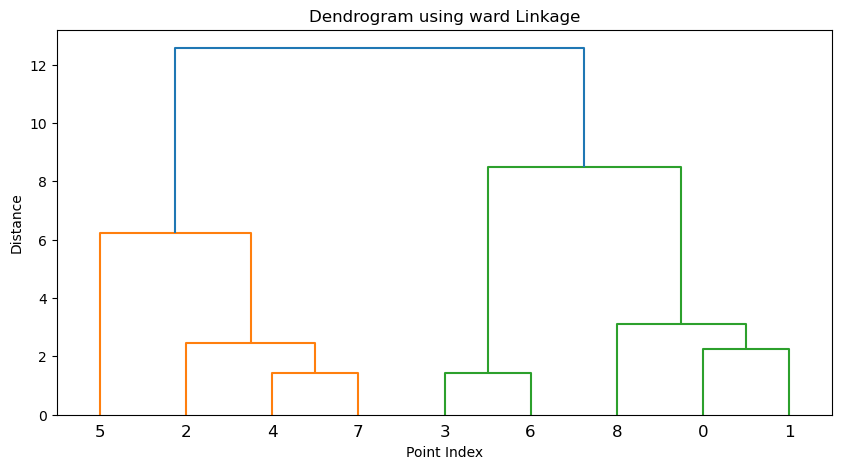

In [10]:
import scipy.cluster.hierarchy as sch

def plot_dendrogram(method):
    plt.figure(figsize=(10, 5))
    Z = sch.linkage(points, method=method)
    sch.dendrogram(Z)
    plt.title(f'Dendrogram using {method} Linkage')
    plt.xlabel('Point Index')
    plt.ylabel('Distance')
    plt.show()

# Plot dendrograms for different linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']
for method in linkage_methods:
    plot_dendrogram(method)
